In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from phik import resources, report

DIR = "kaggle_25/"
games = pd.read_csv(DIR + "games.csv")
s_sabm = pd.read_csv(DIR + "sample_submission.csv")
test = pd.read_csv(DIR + "test.csv")
train = pd.read_csv(DIR + "train.csv")
turns = pd.read_csv(DIR + "turns.csv")

In [127]:
test_games

,game_id,nickname,score,rating,first,winner,created_at,rating_mode,game_duration_seconds
0,2,Super,488,NaN,1,1,2022-08-10 19:19:59,RATED,364.214418
1,2,BetterBot,401,2000.0,0,0,2022-08-10 19:19:59,RATED,364.214418
2,7,STEEBot,377,2082.0,0,0,2022-08-26 03:07:48,RATED,385.599607
3,7,Priya1,379,NaN,1,1,2022-08-26 03:07:48,RATED,385.599607
4,11,STEEBot,334,1829.0,0,0,2022-08-22 01:13:10,CASUAL,501.739156
...,...,...,...,...,...,...,...,...,...
44721,72762,kyjo55555,367,NaN,1,1,2022-08-24 11:16:15,CASUAL,386.086637
44722,72768,HastyBot,524,2356.0,1,0,2022-09-03 07:33:04,RATED,2155.922543
44723,72768,Maximilian,357,NaN,0,1,2022-09-03 07:33:04,RATED,2155.922543
44724,72769,STEEBot,626,2110.0,0,1,2022-09-07 13:24:13,RATED,218.043751


In [145]:
def winner_num(row):
    if row['first'] == row['nickname']:
        return row.winner
    else:
        if row.winner == 0:
            return 1
        if row.winner == 1:
            return 0
        if row.winner == -1:
            return -1

        
def opponent_rate(x, df):
#     print(type(x.rating))
    opponent = df.query('game_id == @x.game_id & nickname != @x.nickname')
    return int(opponent.rating) 


def HandleMissingValues(df):
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'UNKNOWN'
        
    for a in num_cols:
        values[a] = -1
    df.fillna(value=values, inplace=True)

    
train_games = train.merge(games, on='game_id', how='inner')
train_games.shape, train.shape
train_games.winner = train_games.apply(lambda x: winner_num(x), axis=1)
train_games['first'] = train_games.apply(lambda x: 1 if x['nickname'] == x['first'] else 0, axis=1)
train_games = train_games.drop(['lexicon', 'initial_time_seconds', 'increment_seconds', 'max_overtime_minutes', 'time_control_name', 'game_end_reason'], axis=1)# train_games['opponent_rate'] = train_games.apply(lambda x: opponent_rate(x, train_games), axis=1)

In [147]:
test_games = test.merge(games, on='game_id', how='inner')
HandleMissingValues(test_games)
test_games.winner = test_games.apply(lambda x: winner_num(x), axis=1)
test_games['first'] = test_games.apply(lambda x: 1 if x['nickname'] == x['first'] else 0, axis=1)
test_games = test_games.drop(['lexicon', 'initial_time_seconds', 'increment_seconds', 'max_overtime_minutes', 'time_control_name', 'game_end_reason'], axis=1)
test_games['opponent_rate'] = test_games.apply(lambda x: opponent_rate(x, test_games[test_games['rating'].isna() == False]), axis=1)
# test_games

,game_id,nickname,score,rating,first,winner,created_at,rating_mode,game_duration_seconds,opponent_rate
0,2,Super,488,-1.0,1,1,2022-08-10 19:19:59,RATED,364.214418,2000
1,2,BetterBot,401,2000.0,0,0,2022-08-10 19:19:59,RATED,364.214418,-1
2,7,STEEBot,377,2082.0,0,0,2022-08-26 03:07:48,RATED,385.599607,-1
3,7,Priya1,379,-1.0,1,1,2022-08-26 03:07:48,RATED,385.599607,2082
4,11,STEEBot,334,1829.0,0,0,2022-08-22 01:13:10,CASUAL,501.739156,-1
...,...,...,...,...,...,...,...,...,...,...
44721,72762,kyjo55555,367,-1.0,1,1,2022-08-24 11:16:15,CASUAL,386.086637,1710
44722,72768,HastyBot,524,2356.0,1,0,2022-09-03 07:33:04,RATED,2155.922543,-1
44723,72768,Maximilian,357,-1.0,0,1,2022-09-03 07:33:04,RATED,2155.922543,2356
44724,72769,STEEBot,626,2110.0,0,1,2022-09-07 13:24:13,RATED,218.043751,-1


In [153]:
test_final = test_games.drop(columns=['created_at', 'nickname'])
test_final.rating_mode = train_games_w_created_at.rating_mode.apply(lambda x: 1 if 'CASUAL' else 0)

In [149]:
train_games_w_created_at = train_games.drop(columns=['created_at', 'game_id', 'nickname'])
train_games_w_created_at.rating_mode = train_games_w_created_at.rating_mode.apply(lambda x: 1 if 'CASUAL' else 0)

interval columns not set, guessing: ['score', 'rating', 'first', 'winner', 'rating_mode', 'game_duration_seconds', 'opponent_rate']


C:\Users\sahab\anaconda3\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable rating_mode for analysis 1. Dropping this column
  warnings.warn(


(                          score    rating     first    winner  \
 score                  1.000000  0.541163  0.104141  0.043475   
 rating                 0.541163  1.000000  0.000000  0.042679   
 first                  0.104141  0.000000  1.000000  0.167508   
 winner                 0.043475  0.042679  0.167508  1.000000   
 game_duration_seconds  0.081062  0.251308  0.000000  0.020550   
 opponent_rate          0.240800  0.555789  0.000000  0.042679   
 
                        game_duration_seconds  opponent_rate  
 score                               0.081062       0.240800  
 rating                              0.251308       0.555789  
 first                               0.000000       0.000000  
 winner                              0.020550       0.042679  
 game_duration_seconds               1.000000       0.251308  
 opponent_rate                       0.251308       1.000000  ,
 array([[0.55781731],
        [0.70601655],
        [0.20625015],
        [0.17460079],
      

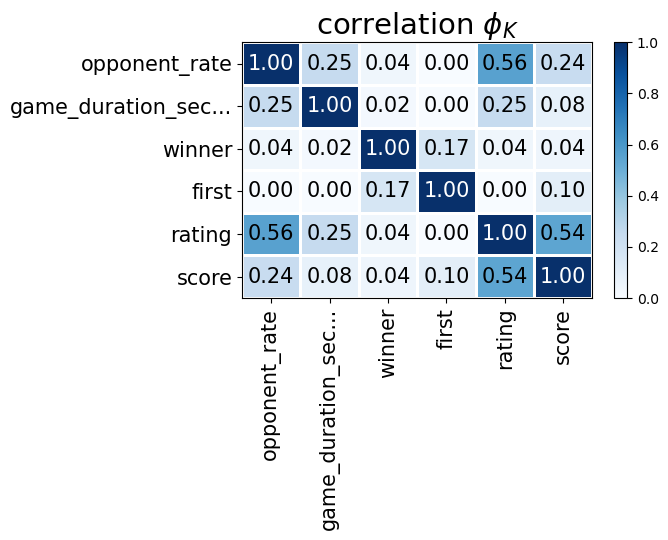

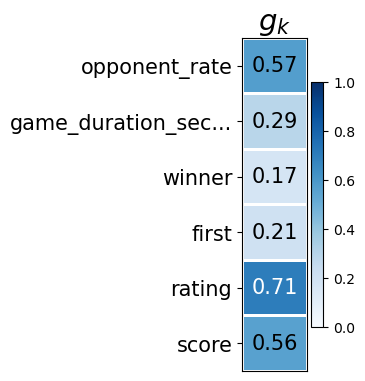

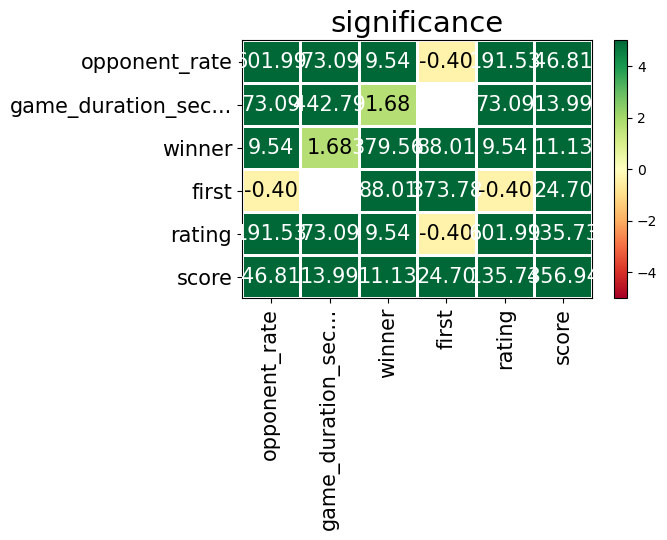

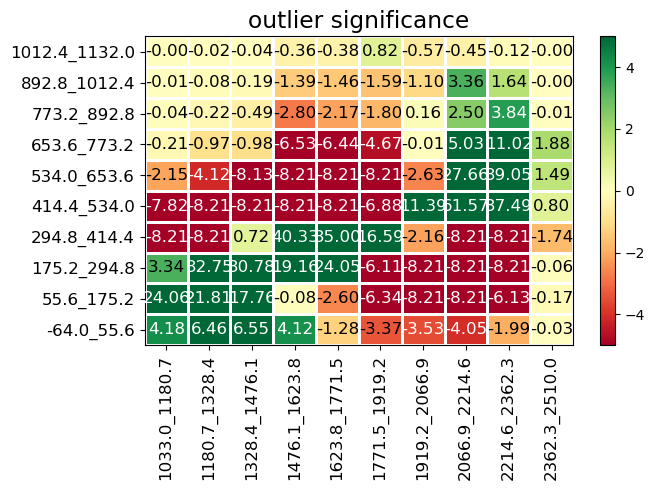

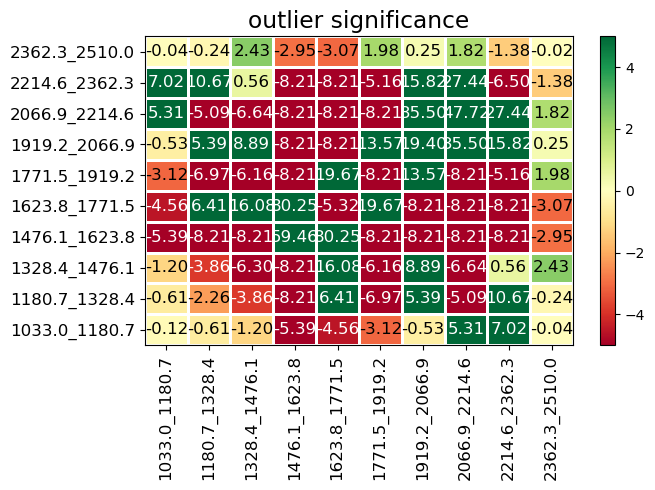

In [57]:
report.correlation_report(train_games_w_created_at)

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(train_games_w_created_at.drop(columns=['rating']), train_games_w_created_at['rating'], test_size=0.95, random_state=42)

In [88]:
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)
mean_squared_error(y_test, pred, squared=False)

153.11621354172553

In [162]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=15000,
                          learning_rate=0.01,
                          task_type="GPU",
                         )

model.fit(X_train,
          y_train,
#           eval_set=(X_test, y_test),
          verbose=1000,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 230.6157804	total: 12.5ms	remaining: 3m 7s
1000:	learn: 152.3371583	total: 9.56s	remaining: 2m 13s
2000:	learn: 150.9267279	total: 17.8s	remaining: 1m 55s
3000:	learn: 150.5573801	total: 25.8s	remaining: 1m 43s
4000:	learn: 150.2940528	total: 33.7s	remaining: 1m 32s
5000:	learn: 150.1663060	total: 41.7s	remaining: 1m 23s
6000:	learn: 150.1133500	total: 49.6s	remaining: 1m 14s
7000:	learn: 149.8579477	total: 57.5s	remaining: 1m 5s
8000:	learn: 149.0363412	total: 1m 5s	remaining: 57.7s
9000:	learn: 148.4066428	total: 1m 13s	remaining: 49.3s
10000:	learn: 147.7848230	total: 1m 22s	remaining: 41s
11000:	learn: 147.5178537	total: 1m 30s	remaining: 32.8s
12000:	learn: 146.9079577	total: 1m 38s	remaining: 24.6s
13000:	learn: 146.2107405	total: 1m 46s	remaining: 16.4s
14000:	learn: 145.4026553	total: 1m 55s	remaining: 8.22s
14999:	learn: 144.8708213	total: 2m 3s	remaining: 0us


In [100]:
preds = model.predict(X_test)

In [103]:
mean_squared_error(y_test, list(map(round, preds)), squared=False)

145.08023108388693

In [155]:
ids = test_final[test_final['rating'] == -1]['game_id']
X = test_final[test_final['rating'] == -1].drop(columns=['game_id'])

In [163]:
first_try_preds = model.predict(X)
rounded_preds = list(map(round, first_try_preds))
answer = pd.DataFrame()
answer['game_id'] = ids
answer['rating'] = rounded_preds

In [164]:
answer.to_csv(DIR + 'answer1.csv')